#### Research question(s).

1) What is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiencea and/or critics agree on the quality of a movie (do they both give high scores or low scores)?

2) How does the year the film was released relate to its IMDb score? How does it relate to its Rotten Tomatoes score? Have audiences and/or critics scored higher or lower for older or newer movies?

3) How does runtime relate to IMDb and Rotten Tomatoes scores, and how has runtime for movies on Netflix changed over the years? Do audiences and/or critics give higher scores to long or short films?

4) How do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?

5) How does target age range for movies differ across platforms? Do some platforms gear towards younger or older audiences more so than others?

#### Data collection and cleaning. 

I downloaded this dataset from Kaggle. It contains all the movies on Netflix as of 10 months ago and includes the movie's title, year it was produced, target age range, IMDB score, Rotten Tomatoes score, other platforms it is available on (Hulu, Prime Video, or Disney+), director(s), genre(s), country it was produced in, the language of the movie, and the movie's runtime. It also included an ID for the movie and a "type" for the movie. This downloaded, uncleaned dataset had 9299 entries. 

To clean this data, I first removed the columns that contained data I do not plan to use: the country the movie was produced in and the language of the movie. Then I removed the spaces from the remaining columns' names and changed the column name "Disney+" to "DisneyPlus" because I thought having the "+" operator at the end of a column name would cause problems when using it later on. Next I removed all rows that did not have complete data, such as missing the movie's runtime or year it was produced; this ensures that all data I work with in this dataset moving forward is complete, accurate, and will not cause me problems by having missing values. Next I removed the "+" from age range values and converted all the values from strings to floats. In order to do this, I changed the "all" cetegorization to 0 to reflect that there was no age limit numerically (meaning there is no reccommended minimum age). My next step in data cleaning was to remove the "%" sign from the Rotten Tomatoes scores and convert both the Rotten Tomatoes and IMDb scores to floats rather than strings. This will allow me to perform analysis on them later on. Finally, I chose to remove all the movies that had a runtime of less than 60 minutes or more than 180 minutes. There are a handful of documentaries or old films that were shorter than 60 minutes or longer than 180 minutes and acting as outliers in my data, thereby throwing off my graphs and analysis. By removing them, I am using movies that have a more standard runtime. I chose to not remove data points based on their IMDb or Rotten Tomatoes score becasue I wanted to include the wide range of movies available on Netflix even if their score is much higher or much lower than others. At the end of data cleaning, I had 2892 entries in my dataset to work with. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Load CSV
rawdata = pd.read_csv('OTTdata.csv')

# Remove columns
rawdata = rawdata.drop(columns = ['Type', 'Language', 'Country', 'ID'])

# Remove spaces in column names and "+" from Disney+ column name
new_colnames = [x.replace(" ", "_") for x in rawdata.columns]
rawdata.columns = new_colnames
rawdata = rawdata.rename(columns={'Disney+':'DisneyPlus'})

#Remove incomplete rows
rawdata = rawdata.dropna()

#Remove "+" from age ranges, change "all" categorization to 0, and convert values to float
rawdata['Age'] = [x.replace("+", "") for x in rawdata["Age"]]
rawdata['Age'] = [x.replace("all", "0") for x in rawdata["Age"]]
rawdata['Age'] = rawdata['Age'].astype(float)

#Remove % on Rotten Tomatoes score and convert scores to float
rawdata['Rotten_Tomatoes'] = [x.replace("%", "") for x in rawdata["Rotten_Tomatoes"]]
rawdata['Rotten_Tomatoes'] = rawdata['Rotten_Tomatoes'].astype(float)
rawdata['IMDb'] = rawdata['IMDb'].astype(float)

#Remove movies with low or high runtimes
rawdata = rawdata.loc[rawdata.Runtime>60].copy()
rawdata = rawdata.loc[rawdata.Runtime<180].copy()

#Cleaned data is OTTdata
OTTdata = rawdata

#### Data description. 

My data in my analysis-ready data has 2892 entries. Each observation is a movie on Netflix (as of 10 months ago). The attributes are each movie's title, year of production, IMDb score, Rotten Tomatoes score, if it is on Hulu, Prime Video or Disney+ in addition to Netflix, its director(s), genre(s), runtime, and recommended minimum audience age (how old you should be to watch the film). Only movies with runtimes 60 minutes and above were included in order to ensure I am working with movies that fit a more standard runtime and do not throw off my data with low runtimes (low runtimes come from short films or documentaries that some may consider not to be feature-length movies at all). 

This dataset was created by Ruchi Bhatia, a Data Science Global Ambassador at HP & NVIDIA, for the purpose of exploring which streaming platforms offer which movies, the average IMDb score of movies on different platforms, the year a movie was produced and the platform it can be found on, and the overall analysis of the popularity/Rotten Tomatoes score of a movie. 

This dataset was orginally created by scraping lists of movies available on various streaming platforms along with an IMDb score dataset. This raw data can be found at: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney. 

#### Data limitations. 

Some data observations were removed because they had incomplete information (such as missing runtime or IMDb/Rotten Tomatoes score. Therefore not all movies that are available on Netflix (as of 10 months ago) are represented here. Furthermore, because this data was updated only 10 months ago, it may not reflect the current distribution of movies across streaming platforms; for example, a movie that was not on Disney+ 10 months ago may be now, but that is not reflected in this dataset.

#### Exploratory data analysis. Perform an (initial) exploratory data analysis. 

mean IMDb score
6.373764787752257
IMDb score standard deviation
0.9379350694845225
min IMDb score
2.5
max IMDb score
9.0


mean Rotten Tomatoes score
61.807237299930414
Rotten Tomatoes score standard deviation
26.68285336930154
min Rotten Tomatoes score
2.0
max Rotten Tomatoes score
100.0


correlation between IMDb score and Rotten Tomatoes score
0.6376943260515737
covariance between IMDb score and Rotten Tomatoes score
15.959438110830057


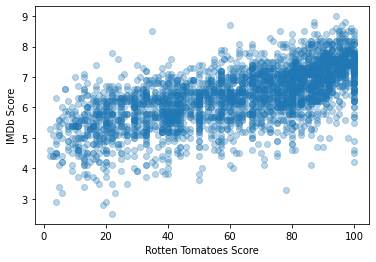

In [3]:
#IMDb score, Rotten Tomatoes score, and their relationship 
plt.scatter(x = OTTdata['Rotten_Tomatoes'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('IMDb Score')

print('mean IMDb score')
print(OTTdata['IMDb'].mean())
print('IMDb score standard deviation')
print(OTTdata['IMDb'].std())
print('min IMDb score')
print(OTTdata['IMDb'].min())
print('max IMDb score')
print(OTTdata['IMDb'].max())
print('\n')
print('mean Rotten Tomatoes score')
print(OTTdata['Rotten_Tomatoes'].mean())
print('Rotten Tomatoes score standard deviation')
print(OTTdata['Rotten_Tomatoes'].std())
print('min Rotten Tomatoes score')
print(OTTdata['Rotten_Tomatoes'].min())
print('max Rotten Tomatoes score')
print(OTTdata['Rotten_Tomatoes'].max())
print('\n')
print('correlation between IMDb score and Rotten Tomatoes score')
print(OTTdata.IMDb.corr(OTTdata.Rotten_Tomatoes))
print('covariance between IMDb score and Rotten Tomatoes score')
print(OTTdata.IMDb.cov(OTTdata.Rotten_Tomatoes))

There is a positive relationship between the Rotten Tomatoes score and IMDb score. Becasue the correlation is .63, there is not a perfect relationship. You can see that as Rotten Tomatoes scores increase, the IMDb score tends to increase as well. Interestingly the standard deviation for IMDb scores (.93) is small relative to the scale of scores (0 to 10) and the standard deviation for Rotten Tomatoes scores (26.68) is larger relative to the scale of scores (0 to 100). 

mean Runtime
103.25434933890048
min Runtime
61.0
max Runtime
177.0
Runtime standard deviation
17.147778796644083


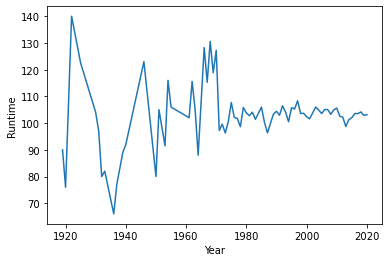

In [4]:
#Runtime by year
print('mean Runtime')
print(OTTdata['Runtime'].mean())
print('min Runtime')
print(OTTdata['Runtime'].min())
print('max Runtime')
print(OTTdata['Runtime'].max())
print('Runtime standard deviation')
print(OTTdata['Runtime'].std())

yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Runtime'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

The runtime of movies on Netflix averages an hour and 43 minutes. Movies made after 1980 also have a more consistent runtime of around 100 minutes (which is interestingly around the mean runtime of all movies on Netflix).

correlation between Runtime and Rotten Tomatoes score
0.07192514666709637
covariance between Runtime and Rotten Tomatoes score
32.90947077401702


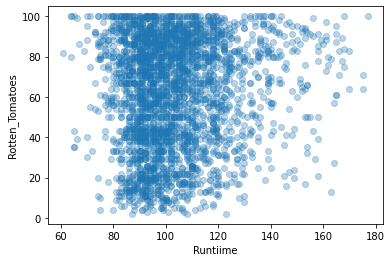

In [5]:
#Runtime and relationship with Rotten Tomatoes score
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['Rotten_Tomatoes'], alpha=.3)
plt.xlabel('Runtiime')
plt.ylabel('Rotten_Tomatoes')

print('correlation between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.Rotten_Tomatoes))
print('covariance between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.cov(OTTdata.Rotten_Tomatoes))

The correlation between Rotten Tomatoes scores and Runtime is really close to zero, meaning there is likely no correlation or relationship between the two. 

correlation between Runtime and IMDb Tomatoes score
0.2667396000903218
covariance between Runtime and IMDb score
4.290107184181377


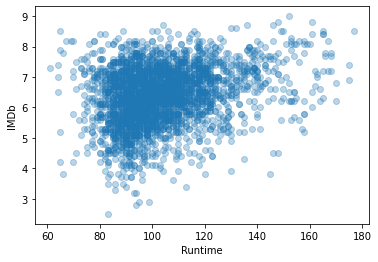

In [6]:
#Runtime and relationship with IMDb score
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Runtime')
plt.ylabel('IMDb')

print('correlation between Runtime and IMDb Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.IMDb))
print('covariance between Runtime and IMDb score')
print(OTTdata.Runtime.cov(OTTdata.IMDb))

There is a slightly positive correlation between the IMDb score and runtime of movies on Netflix, so as runtime increases IMBDb scores increase slightly too. 

mean year of movies on Netflix
2007.2393876130827


correlation between IMDb score and year
-0.1266958628891991
covariance between IMDb score and year
-1.638687843360096


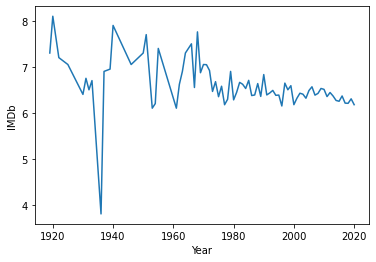

In [7]:
#IMDb scores by year
print('mean year of movies on Netflix')
print(OTTdata['Year'].mean())
print('\n')
print('correlation between IMDb score and year')
print(OTTdata.IMDb.corr(OTTdata.Year))
print('covariance between IMDb score and year')
print(OTTdata.IMDb.cov(OTTdata.Year))

yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'IMDb'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('IMDb')
plt.show()


The correlation between IMDb score and year is negative but small, which aligns with the graph in suggesting that IMDb scores have slightly gone down as years go on. 

correlation between Rotten Tomatoes score and year
-0.04349070033389965
covariance between Rotten Tomatoes score and year
-16.00256848672196


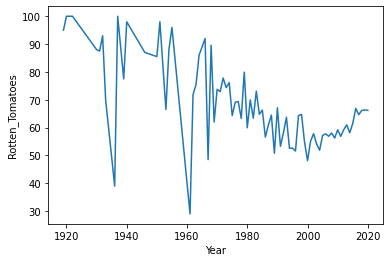

In [8]:
#Rotten Tomatoes scores by year
print('correlation between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.corr(OTTdata.Year))
print('covariance between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.cov(OTTdata.Year))

yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Rotten_Tomatoes'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Rotten_Tomatoes')
plt.show()

The correlation between Rotten Tomatoes score and year is small but negative, which aligns with the graph in suggesting that Rotten Tomatoes scores have gone down slightly for movies made in later years.

mean IMDb score for movies on Netflix
6.412410986775183


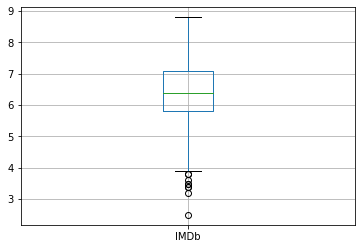

In [9]:
# IMDbcores by platform
Netflixmovies = OTTdata[OTTdata.Netflix==1]
Netflixmovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Netflix')
print(Netflixmovies['IMDb'].mean())

The mean IMDb score for movies on Netflix is around 6.41.

mean IMDb score for movies on Prime Video
6.316637375512601


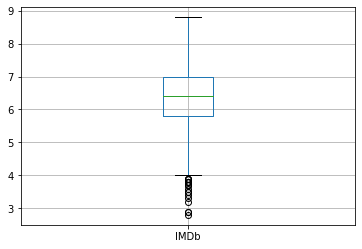

In [10]:
Prime_Videomovies = OTTdata[OTTdata.Prime_Video==1]
Prime_Videomovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Prime Video')
print(Prime_Videomovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Prime Video is 6.3.

mean IMDb score for movies on Disney+
6.677777777777779


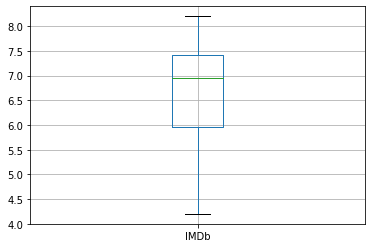

In [11]:
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
Disneymovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Disney+')
print(Disneymovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Disney+ is 6.67.

mean IMDb score for movies on Hulu
6.456410256410259


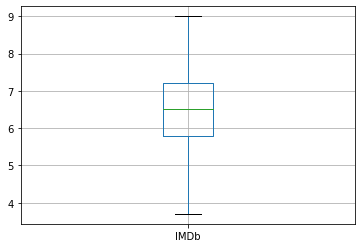

In [12]:
Hulumovies = OTTdata[OTTdata.Hulu==1]
Hulumovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Hulu')
print(Hulumovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Hulu is 6.45.

mean age minimum for movies on Hulu
14.564102564102564
standard deviation of age minimum for movies on Hulu
4.596699135545754


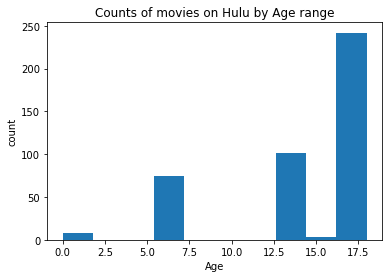

In [13]:
Hulumovies = OTTdata[OTTdata.Hulu==1]
plt.hist(Hulumovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Hulu by Age range')
print('mean age minimum for movies on Hulu')
print(Hulumovies['Age'].mean())
print('standard deviation of age minimum for movies on Hulu')
print(Hulumovies['Age'].std())

Movies on Hulu tend to skew older, and have a mean minimum age of 14.5.

mean age minimum for movies on Disney+
9.5
standard deviation of age minimum for movies on Disney+
4.817248421343991


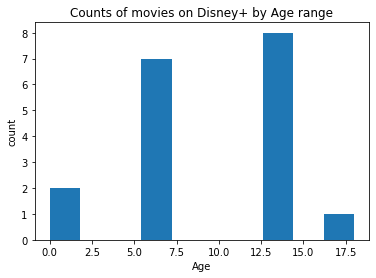

In [14]:
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
plt.hist(Disneymovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Disney+ by Age range')

print('mean age minimum for movies on Disney+')
print(Disneymovies['Age'].mean())
print('standard deviation of age minimum for movies on Disney+')
print(Disneymovies['Age'].std())

Although the counts for movies on Disney+ are lower, the mean minimum age is significantly lower than other platforms at 9.5. Interestingly, the standard deviation is similar to Hulu's, suggesting that platforms offer programming within 5 years of their reccommended minimum audience age. 

mean age minimum for movies on Prime Video
14.565319273579378
standard deviation of age minimum for movies on Prime Video
4.84068986519906


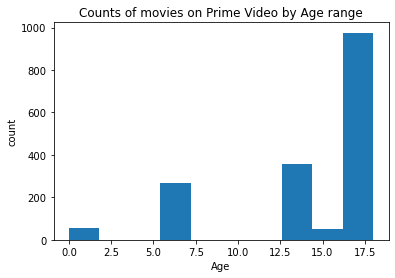

In [15]:
Primemovies = OTTdata[OTTdata.Prime_Video==1]
plt.hist(Primemovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Prime Video by Age range')

print('mean age minimum for movies on Prime Video')
print(Primemovies['Age'].mean())
print('standard deviation of age minimum for movies on Prime Video')
print(Primemovies['Age'].std())

Prime Video has a similar mean minimum age to Hulu at 14.5, suggesting it might have similar target audiences.

mean age minimum for movies on Netflix
14.442522889114954
standard deviation of age minimum for movies on Netflix
4.633459131870704


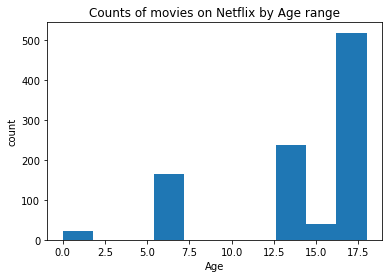

In [16]:
Netflixmovies = OTTdata[OTTdata.Netflix==1]
plt.hist(Netflixmovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Netflix by Age range')

print('mean age minimum for movies on Netflix')
print(Netflixmovies['Age'].mean())
print('standard deviation of age minimum for movies on Netflix')
print(Netflixmovies['Age'].std())

Netflix has a similar mean minimum age to Hulu and Prime Video at 14.4, again suggesting it might have similar target audiences. It also has a standard deviation of 4.6 for minimum reccommended audience age which is similar to the other platforms. 

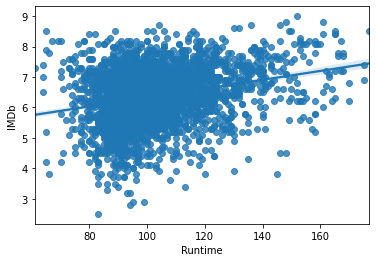

In [22]:
##testing linear reg
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns
sns.regplot(x="Runtime", y="IMDb", data=OTTdata);
# regression = lr
# x = np.array(OTTdata['Runtime'])
# y = np.array(OTTdata['IMDb'])
# fitx = x.reshape(-1,1)
# fity = y
# reg = regression.fit(fitx, fity)
# print ('linear regression slope: ', round(reg.coef_[0],2))

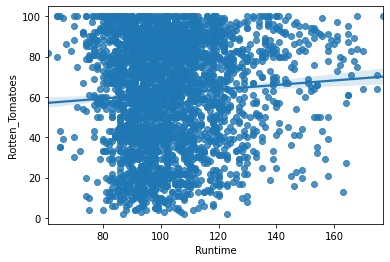

In [23]:
sns.regplot(x="Runtime", y="Rotten_Tomatoes", data=OTTdata);

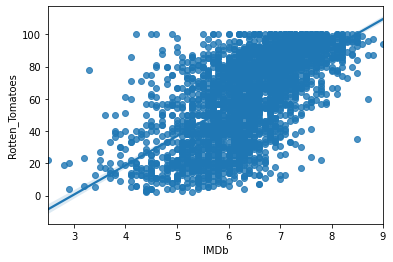

In [33]:
sns.regplot(x="IMDb", y="Rotten_Tomatoes", data=OTTdata);

In [25]:
OTTdata.head()

,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime_Video,DisneyPlus,Directors,Genres,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,Sergio Leone,Western,161.0


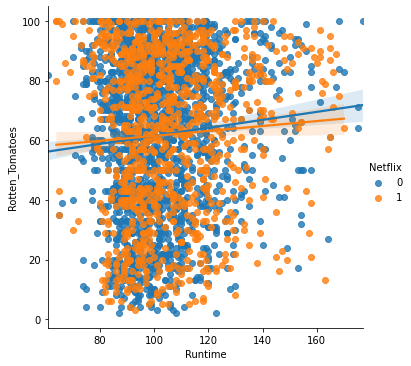

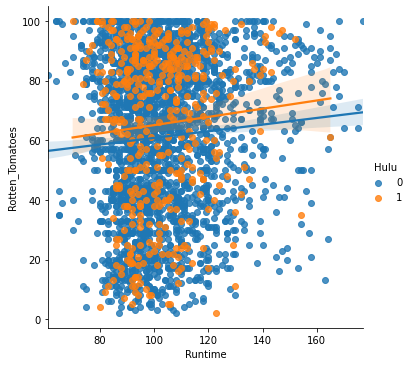

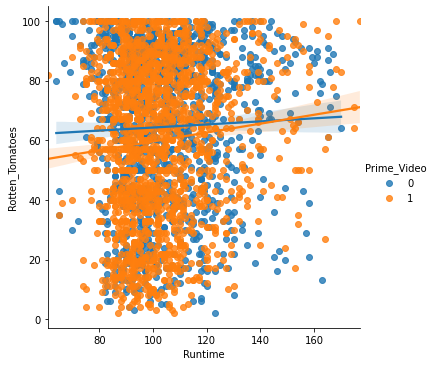

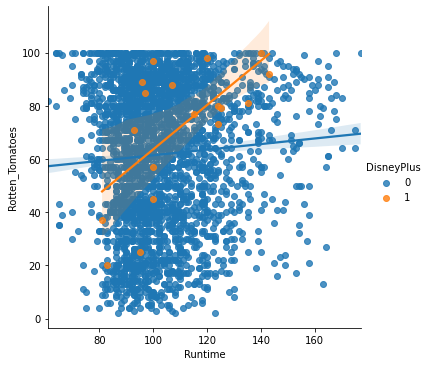

In [31]:
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Netflix', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Hulu', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Prime_Video', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='DisneyPlus', data=OTTdata)

#### Questions for reviewers. 

- Do I have enough research questions, and do the ones I have go in-depth enough?
- I chose not to address all the attributes available to me in this dataset and just select the ones that I thought would be the most interesting to examine. For example, I am not looking at genres of movies of the country they were filmed in. Do you agree with my choice, or do you find these attributes interesting enough to include in my analysis?